## Homework 3

* Generate dataset using `make_blobs` function in the sklearn.datasets class. Generate 2000 samples with 3 features (X) with one label (y).
* Explore and analyse raw data.
* Do preprocessing for classification.
* Split your dataset into train and test test (0.7 for train and 0.3 for test).
* Try Decision Tree and XGBoost Algorithm with different hyperparameters. (Using GridSearchCV is a plus)
* Evaluate your result on both train and test set. Analyse if there is any underfitting or overfitting problem. Make your comments.

In [16]:
import numpy as np
import pandas as pd

In [17]:
from sklearn.datasets import make_blobs

In [18]:
X, y = make_blobs(n_samples=2000, n_features=3, cluster_std=5, random_state=42)     

In [19]:
X

array([[ -7.14243986,  -0.95837972,  -0.53928632],
       [-13.32917467,   8.62763875,   1.8981369 ],
       [ -4.02612893,  -8.34090327,  -6.11459963],
       ...,
       [ -7.61732832,  -7.6301483 ,  -0.11996721],
       [  9.11875478,  -9.95437938,  -5.25503891],
       [-10.65716255,  11.7736044 ,  14.66774906]])

In [20]:
X.shape

(2000, 3)

In [21]:
y.shape

(2000,)

In [22]:
type(y)

numpy.ndarray

In [23]:
# Unique values of y dataset
np.unique(y)

array([0, 1, 2])

In [24]:
class_values = np.unique(y)

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
data = pd.DataFrame(X, columns = ["Feature1", "Feature2", "Feature3"])

In [27]:
data["Label"] = y

In [28]:
data.head()

,Feature1,Feature2,Feature3,Label
0,-7.142440,-0.958380,-0.539286,2
1,-13.329175,8.627639,1.898137,2
2,-4.026129,-8.340903,-6.114600,1
3,0.833730,-1.909978,-11.421141,1
4,0.026162,1.074897,-12.395227,1


# Visualize

In [29]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)

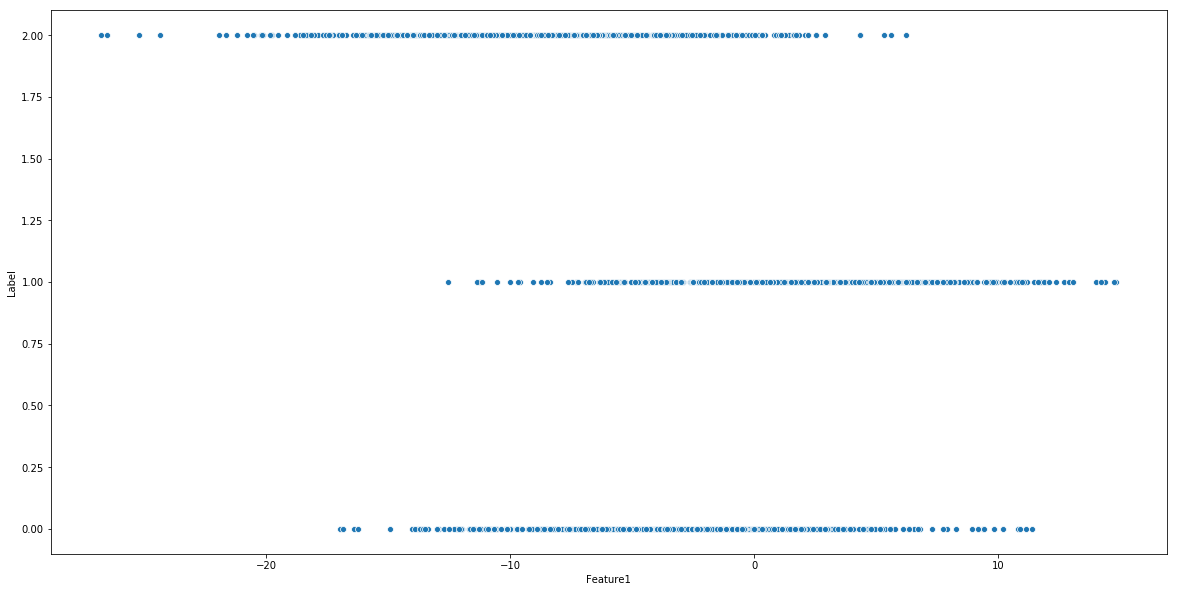

In [30]:
sns.scatterplot(x=data["Feature1"], y=data["Label"], data=data)

C:\Users\Murat\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


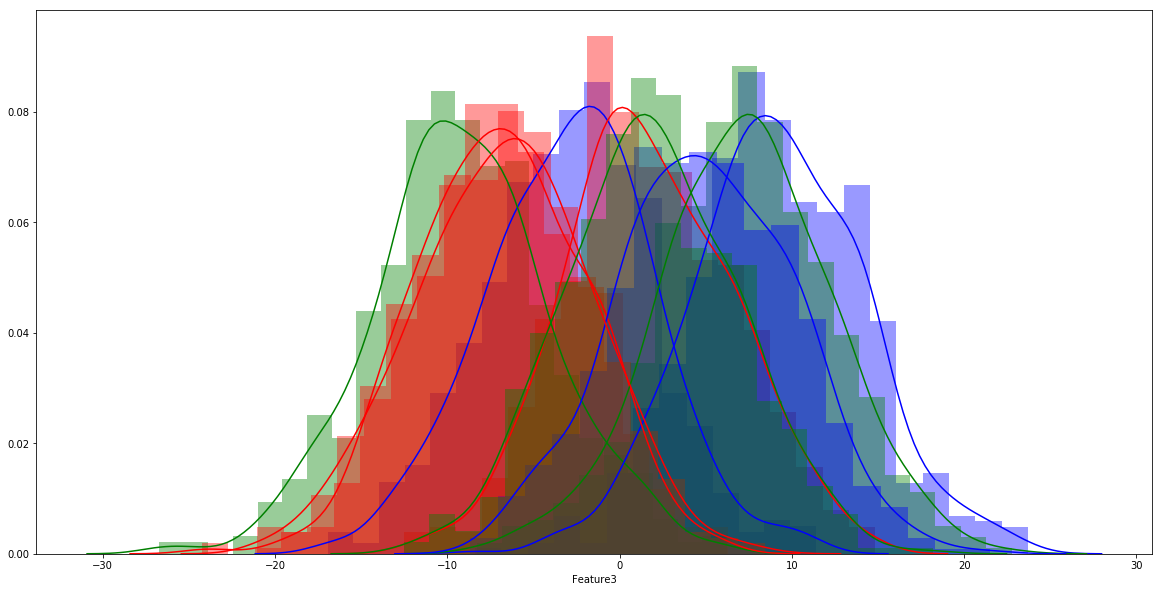

In [31]:
for column in data.columns[:-1]:
    sns.distplot(data[data["Label"]== 0][column], color = "b")
    sns.distplot(data[data["Label"]== 1][column], color = "r")
    sns.distplot(data[data["Label"]== 2][column], color = "g")

C:\Users\Murat\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Murat\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Murat\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


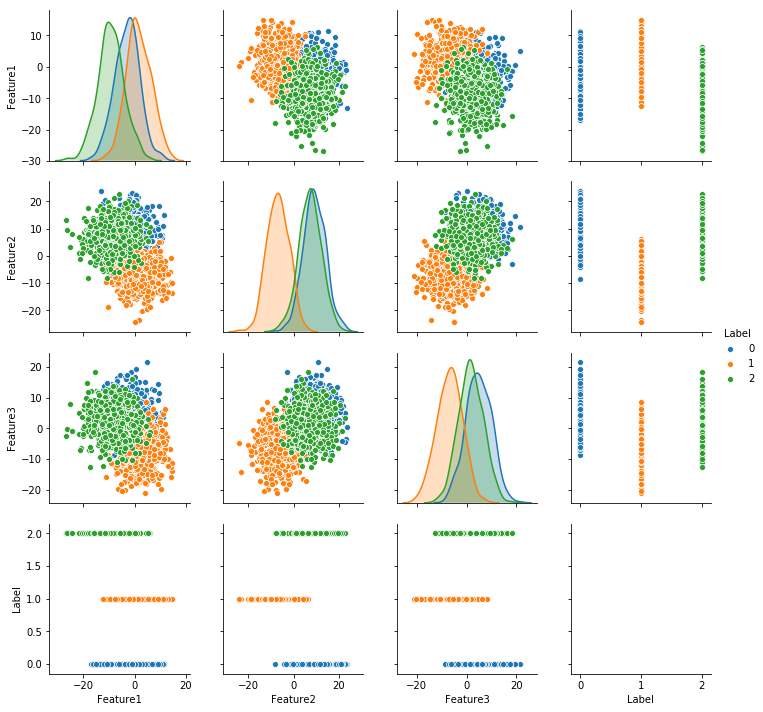

In [32]:
sns.pairplot(data, hue="Label")

# Data Preprocessing

In [33]:
# Splitting the data to train and test

In [34]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  

### Scaling

In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [46]:
sns.set_style("whitegrid")

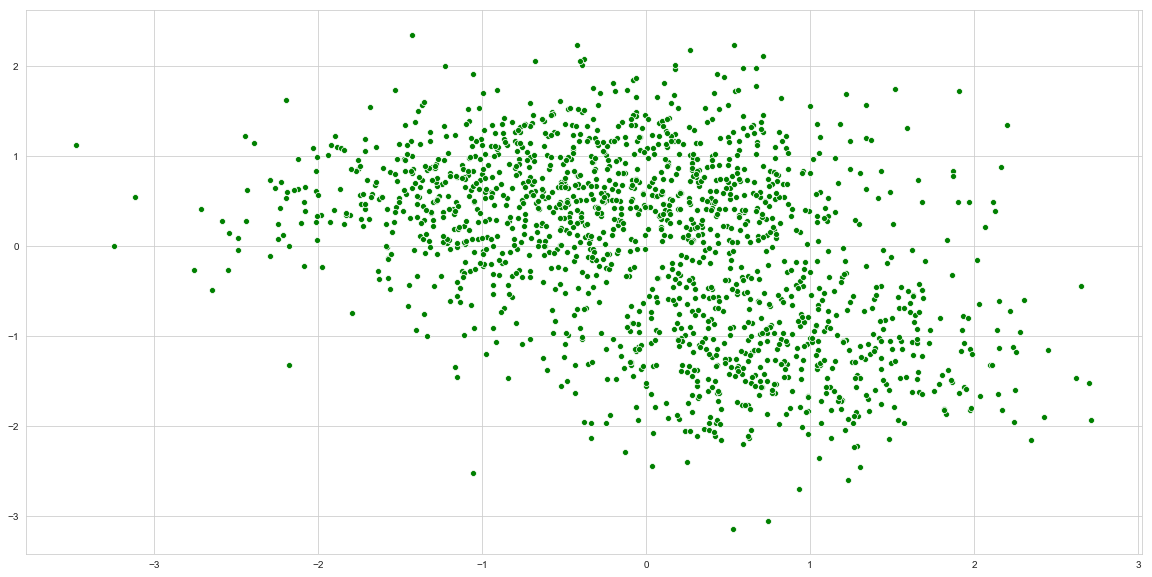

In [47]:
#Scatter plot of train dataset
sns.scatterplot(X_train.T[0], X_train.T[1],color='g')

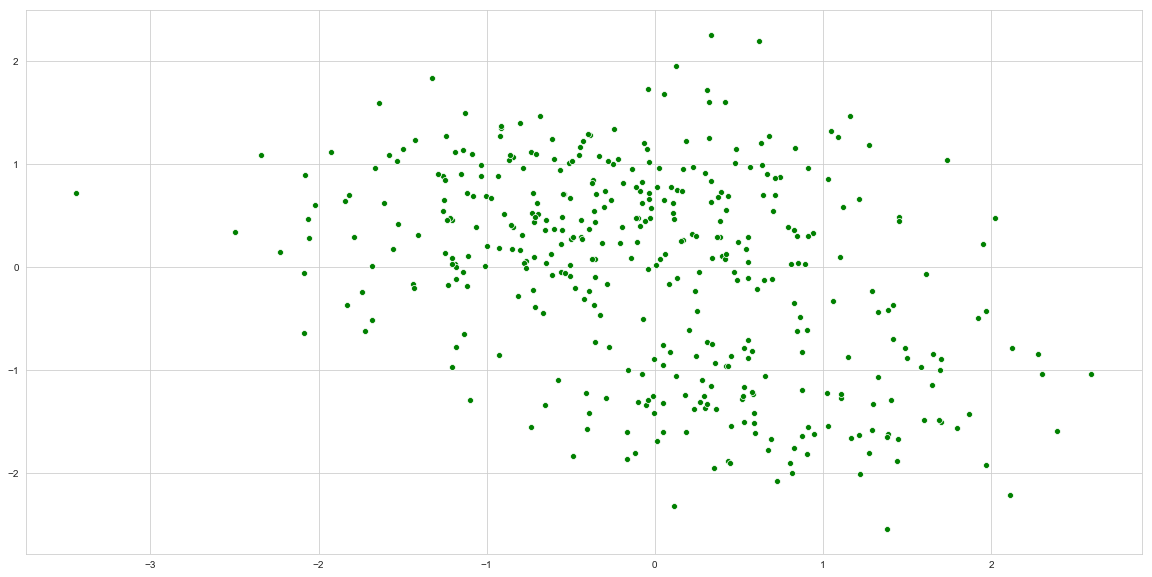

In [48]:
#Scatter plot of test dataset
sns.scatterplot(X_test.T[0], X_test.T[1],color='g')

C:\Users\Murat\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


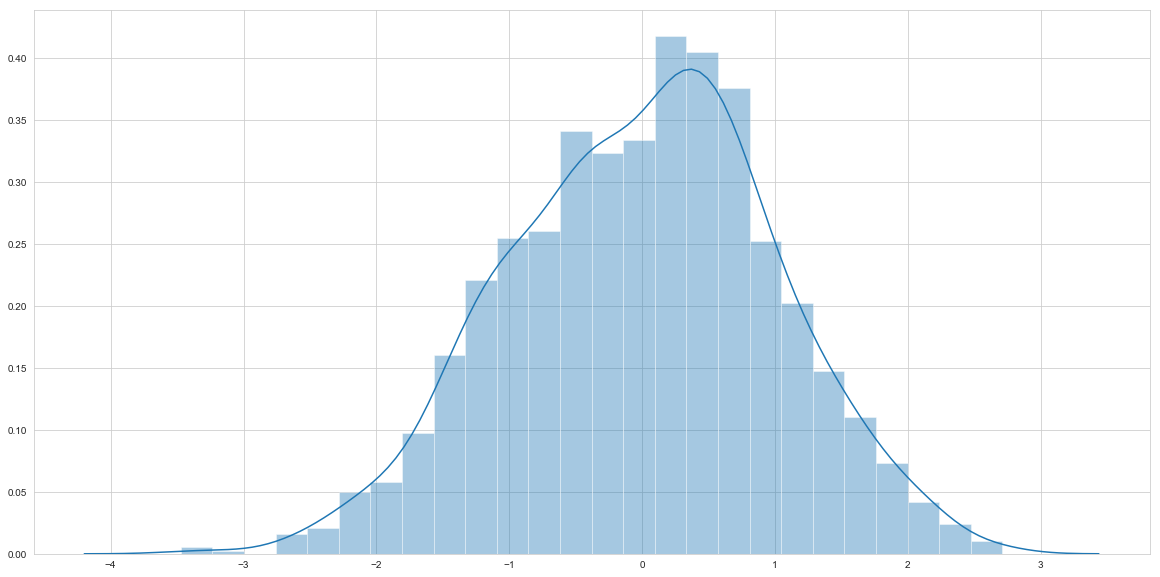

In [49]:
sns.distplot(X_train.T[0])

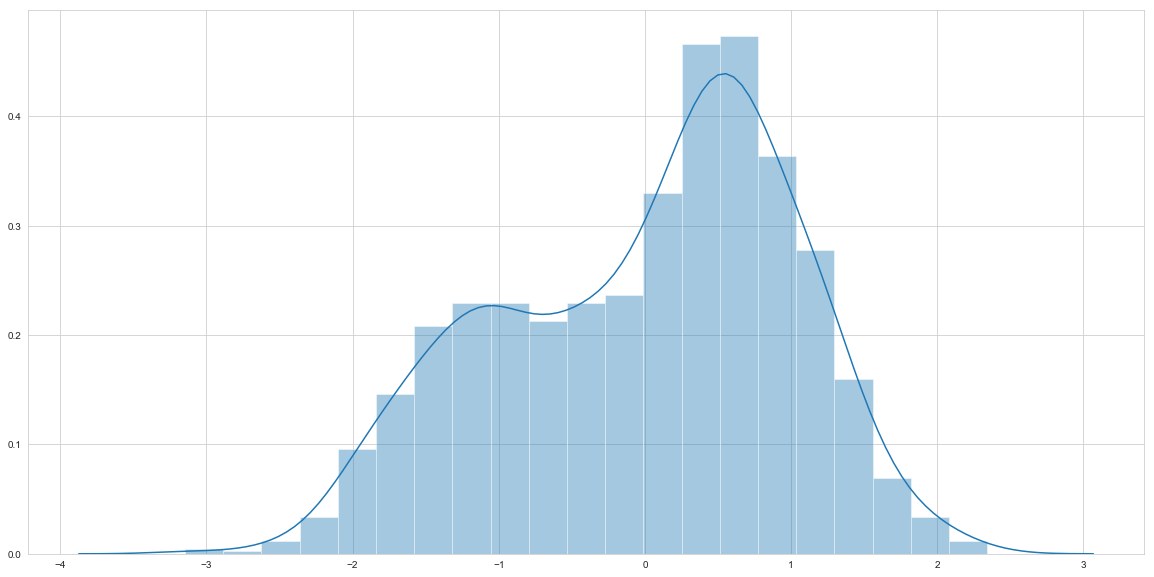

In [50]:
sns.distplot(X_train.T[1])

# Model

In [51]:
!pip install xgboost

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from xgboost.sklearn import XGBClassifier

### XGboot Classifier

In [116]:
param_dict = {
    'max_depth':range(1,10,2),
    'min_child_weight':range(1,6,2),
    'learning_rate': [0.00001,0.001,0.01,0.1,1,2],
    'n_estimators': [10,190,200,210,500,1000,2000]
    
}

xgc = XGBClassifier(booster='gbtree', learning_rate =0.01, n_estimators=200, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'multi:softprob', nthread=4, scale_pos_weight=1, seed=27)

In [120]:
xgc_model = xgc.fit(X_train,y_train)

C:\Users\Murat\Anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:19:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:19:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [122]:
best_preds = np.asarray([np.argmax(line) for line in preds])

In [123]:
best_preds

array([0, 1, 0, 1, 0, 2, 2, 0, 0, 0, 1, 1, 1, 2, 0, 0, 1, 0, 2, 0, 2, 0,
       2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 1, 2, 0, 0, 2, 1, 2, 2, 2, 2, 0,
       2, 0, 1, 1, 1, 1, 0, 2, 2, 1, 0, 0, 1, 1, 1, 1, 2, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 2, 1, 0, 2, 2, 0, 0, 0, 1, 0, 2, 1, 1, 1, 1, 1, 2, 0,
       0, 1, 2, 1, 1, 0, 2, 2, 2, 1, 1, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 2,
       2, 0, 2, 1, 2, 2, 2, 0, 2, 0, 1, 0, 2, 1, 1, 1, 1, 2, 2, 0, 2, 0,
       0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 1, 0, 0,
       0, 1, 1, 1, 1, 2, 0, 0, 1, 2, 0, 0, 2, 1, 1, 1, 0, 1, 2, 1, 1, 1,
       1, 2, 1, 1, 2, 1, 0, 1, 1, 1, 0, 0, 0, 2, 1, 0, 0, 1, 0, 1, 2, 0,
       2, 2, 2, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 2, 2, 0, 1, 0, 2, 0, 2, 0,
       0, 0, 0, 0, 2, 0, 0, 2, 2, 1, 1, 2, 1, 2, 1, 0, 0, 2, 1, 0, 0, 2,
       1, 0, 0, 0, 0, 0, 2, 1, 2, 0, 1, 0, 2, 0, 2, 0, 2, 1, 0, 1, 0, 0,
       0, 1, 2, 1, 0, 0, 1, 0, 1, 2, 1, 1, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2,
       0, 0, 1, 0, 0, 2, 2, 2, 1, 1, 0, 2, 2, 1, 2,

In [127]:
print("Train Score {:.6f}".format(xgc_model.score(X_train,y_train)))
print("Test Score {:.6f}".format(xgc_model.score(X_test,y_test)))

Train Score 0.886250
Test Score 0.805000


In [128]:
print("Precision = {}".format(precision_score(y_test, best_preds, average='macro')))
print("Recall = {}".format(recall_score(y_test, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, best_preds)))

Precision = 0.804145349599895
Recall = 0.8029097646033131
Accuracy = 0.795


In [132]:
pred_xgc_model = xgc_model.predict(X_test)
print(classification_report(y_test,pred_xgc_model))

              precision    recall  f1-score   support

           0       0.67      0.82      0.74       124
           1       0.95      0.95      0.95       128
           2       0.82      0.66      0.73       148

   micro avg       0.81      0.81      0.81       400
   macro avg       0.81      0.81      0.81       400
weighted avg       0.82      0.81      0.80       400



### Decision Tree Classfier

In [107]:
param_dict = {
    'max_depth':range(2,8,2),
    'min_samples_split': range(2,8,2),
    'min_samples_leaf': range(1,10,2),
}

In [108]:
clf_decision = DecisionTreeClassifier(max_depth=3, min_samples_split=2, random_state=42)

clf_dec_grid = GridSearchCV(clf_decision,param_dict,cv=3, n_jobs = -1).fit(X_train,y_train)

In [109]:
print("Tuned: {}".format(clf_dec_grid.best_params_)) 
print("Mean of the cv scores is {:.6f}".format(clf_dec_grid.best_score_))
print("Train Score {:.6f}".format(clf_dec_grid.score(X_train,y_train)))
print("Test Score {:.6f}".format(clf_dec_grid.score(X_test,y_test)))
print("Seconds used for refitting the best model on the train dataset: {:.6f}".format(clf_dec_grid.refit_time_))

Tuned: {'max_depth': 6, 'min_samples_leaf': 9, 'min_samples_split': 2}
Mean of the cv scores is 0.821875
Train Score 0.851875
Test Score 0.805000
Seconds used for refitting the best model on the train dataset: 0.004985


# Results

In [110]:
# Classification Report
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score

In [130]:
pred_clf_dec_grid = clf_dec_grid.predict(X_test)
print(classification_report(y_test,pred_clf_dec_grid))

              precision    recall  f1-score   support

           0       0.65      0.88      0.75       124
           1       0.96      0.92      0.94       128
           2       0.86      0.64      0.74       148

   micro avg       0.81      0.81      0.81       400
   macro avg       0.83      0.81      0.81       400
weighted avg       0.83      0.81      0.81       400



### Decision Tree Confusion Matrix

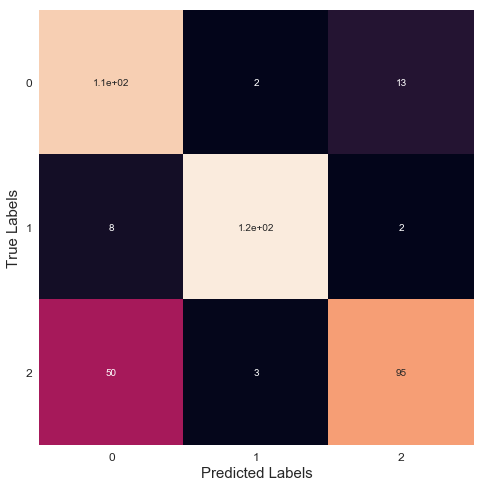

In [115]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred_clf_dec_grid)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(class_values, fontsize = 12)
ax.yaxis.set_ticklabels(class_values, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

### Xgboot Confusion Matrix

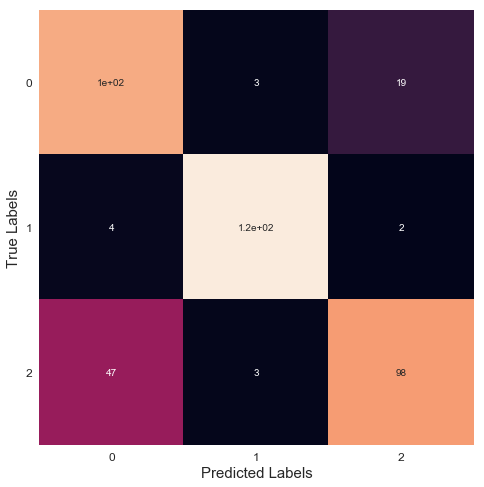

In [134]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(12, 8))
cm = confusion_matrix(y_test, pred_xgc_model)
ax = sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(class_values, fontsize = 12)
ax.yaxis.set_ticklabels(class_values, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

# Conclusion

In [137]:
print("Accuracy of train xgboost:",xgc_model.score(X_train,y_train))
print("Accuracy of test xgboost:",xgc_model.score(X_test,y_test))
print("Accuracy of train decision tree:",clf_dec_grid.score(X_train,y_train))
print("Accuracy of test decision tree:",clf_dec_grid.score(X_test,y_test))


Accuracy of train xgboost: 0.88625
Accuracy of test xgboost: 0.805
Accuracy of train decision tree: 0.851875
Accuracy of test decision tree: 0.805


In [145]:
print("xgboost Bias for training: ", 1- xgc_model.score(X_train,y_train))
print("xgboost Bias for test: ", 1- xgc_model.score(X_test,y_test))
print("xgboost Variance: ", abs(xgc_model.score(X_test,y_test) - xgc_model.score(X_train,y_train)))

print("--"*50)
print("decision tree Bias for training: ", 1- clf_dec_grid.score(X_train,y_train))
print("decision tree Bias for test: ", 1- clf_dec_grid.score(X_test,y_test))
print("decision tree Variance: ", abs(clf_dec_grid.score(X_test,y_test) - clf_dec_grid.score(X_train,y_train)))


xgboost Bias for training:  0.11375000000000002
xgboost Bias for test:  0.19499999999999995
xgboost Variance:  0.08124999999999993
----------------------------------------------------------------------------------------------------
decision tree Bias for training:  0.14812499999999995
decision tree Bias for test:  0.19499999999999995
decision tree Variance:  0.046875


As you can see in the above results, there is no overfitting or underfitting problem.

And variance and bias is lower to be able to overfitting or underfitting